In [1]:
### Packages

using Printf
using LinearAlgebra
using JLD
using QuadGK
using Statistics
using PyCall
using PyPlot
using LaTeXStrings
using GadgetIO
using GadgetUnits
using GadgetGalaxies
using Unitful
using UnitfulAstro
using Missings
using HypothesisTests
using Distributions
using CSV
using DataFrames
using Cosmology
using Suppressor

In [9]:
# Playground

a = missings(Float64, 3, 0)
@show a
a = hcat(a, zeros(3))
a = hcat(a, zeros(3))
a = hcat(a, zeros(3))
@show a
replace!(a, 0. => missing)
@show a

a = Matrix{Union{Missing, Float64}}(undef, 3, 0)
a = Union{Missing, Float64}[0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
a = Union{Missing, Float64}[missing missing missing; missing missing missing; missing missing missing]


3×3 Matrix{Union{Missing, Float64}}:
 missing  missing  missing
 missing  missing  missing
 missing  missing  missing

In [2]:
### Settings

box         = "/HydroSims/Magneticum/Box4/uhr_test"
input_dir   = "/home/moon/sfortune/spinevo/halostories_20210925"
mass_ST_thr = 10e10

storyfilelist   = readdir(input_dir)
print("")

In [104]:
# Assemble Data

assembly_STARS = Dict(
    "SNAP"          => missings(Int64  , 0),
    "I_SUB"         => missings(Int64  , 0),
    "N_MERGERS"     => missings(Int64  , 0),
    "ID_ISUB"       => missings(Int64  , 0),
    "ID_Mfelix"     => missings(Float64, 0),
    "ID_M2"         => missings(Float64, 0),
    "REDSHIFT"      => missings(Float64, 0),
    "LOOKBACKTIME"  => missings(Float64, 0),
    "M_MM"          => missings(Float64, 0),
    "M2_MM"         => missings(Float64, 0),
    "δM_felix"      => missings(Float64, 0), 
    "δM2_felix"     => missings(Float64, 0), 
    "δM_fromJ"      => missings(Float64, 0), 
    "M_felix"       => missings(Float64, 0), 
    "M2_felix"      => missings(Float64, 0), 
    "M_fromJ"       => missings(Float64, 0), 
    "ϕ_flip"        => missings(Float64, 0), 
    "M_MERGERS"     => missings(Float64, 0),
    "M_MISSED"      => missings(Float64, 0), 
    "M_CONSIDERED"  => missings(Float64, 0),  
    "M2_MERGERS"    => missings(Float64, 0),
    "M2_MISSED"     => missings(Float64, 0), 
    "M2_CONSIDERED" => missings(Float64, 0),  
    "BVAL"          => missings(Float64, 0), 
    "δBVAL"         => missings(Float64, 0), 
    "J_MMorbital"   => missings(Float64, 3, 0), 
    "J_SUMorbital"  => missings(Float64, 3, 0), 
    "δJ_main"       => missings(Float64, 3, 0), 
    "J_main"        => missings(Float64, 3, 0), 
    "j_main"        => missings(Float64, 3, 0), 
    "δj_main"       => missings(Float64, 3, 0))

assembly_GAS = Dict(
    "SNAP"          => missings(Int64  , 0),
    "I_SUB"         => missings(Int64  , 0),
    "N_MERGERS"     => missings(Int64  , 0),
    "ID_ISUB"       => missings(Int64  , 0),
    "ID_Mfelix"     => missings(Float64, 0),
    "ID_M2"         => missings(Float64, 0),
    "REDSHIFT"      => missings(Float64, 0),
    "LOOKBACKTIME"  => missings(Float64, 0),
    "M_MM"          => missings(Float64, 0),
    "M2_MM"         => missings(Float64, 0),
    "δM_felix"      => missings(Float64, 0), 
    "δM2_felix"     => missings(Float64, 0), 
    "δM_fromJ"      => missings(Float64, 0), 
    "M_felix"       => missings(Float64, 0), 
    "M2_felix"      => missings(Float64, 0), 
    "M_fromJ"       => missings(Float64, 0), 
    "ϕ_flip"        => missings(Float64, 0), 
    "M_MERGERS"     => missings(Float64, 0),
    "M_MISSED"      => missings(Float64, 0), 
    "M_CONSIDERED"  => missings(Float64, 0),  
    "M2_MERGERS"    => missings(Float64, 0),
    "M2_MISSED"     => missings(Float64, 0), 
    "M2_CONSIDERED" => missings(Float64, 0),  
    "BVAL"          => missings(Float64, 0), 
    "δBVAL"         => missings(Float64, 0), 
    "J_MMorbital"   => missings(Float64, 3, 0), 
    "J_SUMorbital"  => missings(Float64, 3, 0), 
    "δJ_main"       => missings(Float64, 3, 0), 
    "J_main"        => missings(Float64, 3, 0), 
    "j_main"        => missings(Float64, 3, 0), 
    "δj_main"       => missings(Float64, 3, 0))

assembly_DM = Dict(
    "SNAP"          => missings(Int64  , 0),
    "I_SUB"         => missings(Int64  , 0),
    "N_MERGERS"     => missings(Int64  , 0),
    "ID_ISUB"       => missings(Int64  , 0),
    "ID_Mfelix"     => missings(Float64, 0),
    "ID_M2"         => missings(Float64, 0),
    "REDSHIFT"      => missings(Float64, 0),
    "LOOKBACKTIME"  => missings(Float64, 0),
    "M_MM"          => missings(Float64, 0),
    "M2_MM"         => missings(Float64, 0),
    "δM_felix"      => missings(Float64, 0), 
    "δM2_felix"     => missings(Float64, 0), 
    "δM_fromJ"      => missings(Float64, 0), 
    "M_felix"       => missings(Float64, 0), 
    "M2_felix"      => missings(Float64, 0), 
    "M_fromJ"       => missings(Float64, 0), 
    "ϕ_flip"        => missings(Float64, 0), 
    "M_MERGERS"     => missings(Float64, 0),
    "M_MISSED"      => missings(Float64, 0), 
    "M_CONSIDERED"  => missings(Float64, 0),  
    "M2_MERGERS"    => missings(Float64, 0),
    "M2_MISSED"     => missings(Float64, 0), 
    "M2_CONSIDERED" => missings(Float64, 0),  
    "BVAL"          => missings(Float64, 0), 
    "δBVAL"         => missings(Float64, 0), 
    "J_MMorbital"   => missings(Float64, 3, 0), 
    "J_SUMorbital"  => missings(Float64, 3, 0), 
    "δJ_main"       => missings(Float64, 3, 0), 
    "J_main"        => missings(Float64, 3, 0), 
    "j_main"        => missings(Float64, 3, 0), 
    "δj_main"       => missings(Float64, 3, 0))


limit_filelist  = length(storyfilelist)
for ii in 1:limit_filelist
    print("$ii ")
    merger_collection_STARS = load(joinpath(input_dir, storyfilelist[ii]), "merger_collection_STARS")
    merger_collection_GAS   = load(joinpath(input_dir, storyfilelist[ii]), "merger_collection_GAS")
    merger_collection_DM    = load(joinpath(input_dir, storyfilelist[ii]), "merger_collection_DM")
    for i in 1:length(merger_collection_STARS["SNAP"         ])
        if merger_collection_STARS["M2_felix"][i] > mass_ST_thr
            assembly["SNAP"         ]   = vcat( assembly["SNAP"         ], merger_collection_STARS["SNAP"         ][i] )
            assembly["I_SUB"        ]   = vcat( assembly["I_SUB"        ], merger_collection_STARS["I_SUB"        ][i] )
            assembly["ID_ISUB"      ]   = vcat( assembly["ID_ISUB"      ], merger_collection_STARS["ID_ISUB"      ][i] )
            assembly["ID_Mfelix"    ]   = vcat( assembly["ID_Mfelix"    ], merger_collection_STARS["ID_Mfelix"    ][i] )
            assembly["ID_M2"        ]   = vcat( assembly["ID_M2"        ], merger_collection_STARS["ID_M2"        ][i] )
            assembly["REDSHIFT"     ]   = vcat( assembly["REDSHIFT"     ], merger_collection_STARS["REDSHIFT"     ][i] )
            assembly["LOOKBACKTIME" ]   = vcat( assembly["LOOKBACKTIME" ], merger_collection_STARS["LOOKBACKTIME" ][i] )
            assembly["M_MM"         ]   = vcat( assembly["M_MM"         ], merger_collection_STARS["M_MM"         ][i] )
            assembly["M2_MM"        ]   = vcat( assembly["M2_MM"        ], merger_collection_STARS["M2_MM"        ][i] )
            assembly["δM_felix"     ]   = vcat( assembly["δM_felix"     ], merger_collection_STARS["δM_felix"     ][i] )
            assembly["δM2_felix"    ]   = vcat( assembly["δM2_felix"    ], merger_collection_STARS["δM2_felix"    ][i] )
            assembly["δM_fromJ"     ]   = vcat( assembly["δM_fromJ"     ], merger_collection_STARS["δM_fromJ"     ][i] )
            assembly["M_felix"      ]   = vcat( assembly["M_felix"      ], merger_collection_STARS["M_felix"      ][i] )
            assembly["M2_felix"     ]   = vcat( assembly["M2_felix"     ], merger_collection_STARS["M2_felix"     ][i] )
            assembly["M_fromJ"      ]   = vcat( assembly["M_fromJ"      ], merger_collection_STARS["M_fromJ"      ][i] )
            assembly["ϕ_flip"       ]   = vcat( assembly["ϕ_flip"       ], merger_collection_STARS["ϕ_flip"       ][i] )
            assembly["N_MERGERS"    ]   = vcat( assembly["N_MERGERS"    ], merger_collection_STARS["N_MERGERS"    ][i] )
            assembly["M_MERGERS"    ]   = vcat( assembly["M_MERGERS"    ], merger_collection_STARS["M_MERGERS"    ][i] )
            assembly["M_MISSED"     ]   = vcat( assembly["M_MISSED"     ], merger_collection_STARS["M_MISSED"     ][i] )
            assembly["M_CONSIDERED" ]   = vcat( assembly["M_CONSIDERED" ], merger_collection_STARS["M_CONSIDERED" ][i] )
            assembly["M2_MERGERS"   ]   = vcat( assembly["M2_MERGERS"   ], merger_collection_STARS["M2_MERGERS"   ][i] )
            assembly["M2_MISSED"    ]   = vcat( assembly["M2_MISSED"    ], merger_collection_STARS["M2_MISSED"    ][i] )
            assembly["M2_CONSIDERED"]   = vcat( assembly["M2_CONSIDERED"], merger_collection_STARS["M2_CONSIDERED"][i] )
            assembly["BVAL"         ]   = vcat( assembly["BVAL"         ], merger_collection_STARS["BVAL"         ][i] )
            assembly["δBVAL"        ]   = vcat( assembly["δBVAL"        ], merger_collection_STARS["δBVAL"        ][i] )
            assembly["J_MMorbital"  ]   = hcat( assembly["J_MMorbital"  ], merger_collection_STARS["J_MMorbital"  ][:,i] )
            assembly["J_SUMorbital" ]   = hcat( assembly["J_SUMorbital" ], merger_collection_STARS["J_SUMorbital" ][:,i] )
            assembly["δJ_main"      ]   = hcat( assembly["δJ_main"      ], merger_collection_STARS["δJ_main"      ][:,i] )
            assembly["J_main"       ]   = hcat( assembly["J_main"       ], merger_collection_STARS["J_main"       ][:,i] )
            assembly["j_main"       ]   = hcat( assembly["j_main"       ], merger_collection_STARS["j_main"       ][:,i] )
            assembly["δj_main"      ]   = hcat( assembly["δj_main"      ], merger_collection_STARS["δj_main"      ][:,i] )
        end
    end
end
println("\n\n$(size(assembly["J_main"       ]))")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

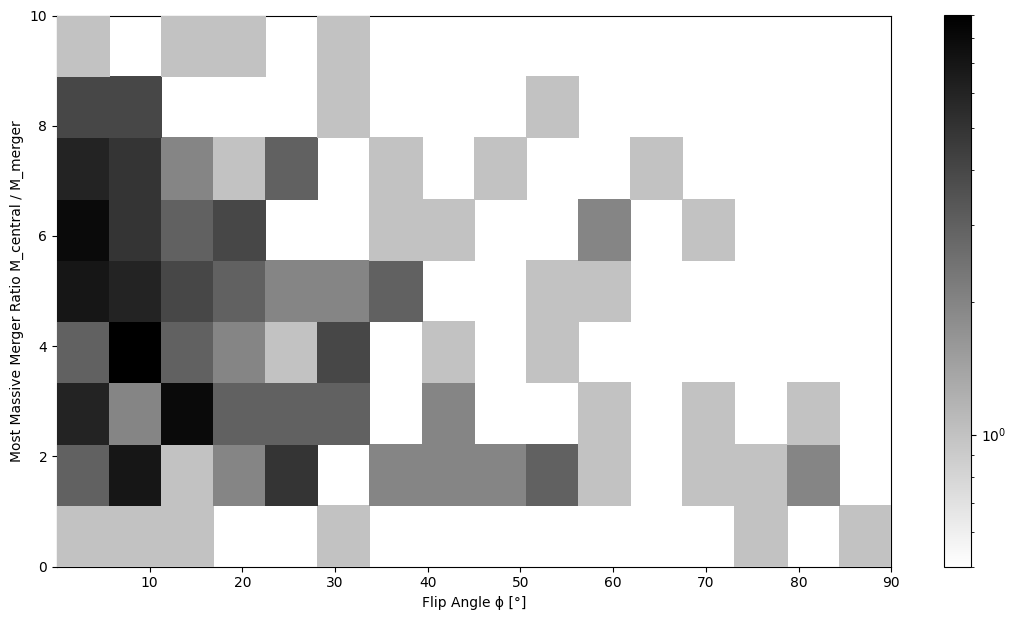

In [106]:
bin_factor  = 1
ϕmin        = minimum(assembly["ϕ_flip"])
ϕmax        = 90#maximum(assembly["ϕ_flip"])

axes_grid1  = pyimport("mpl_toolkits.axes_grid1")
pltcolors   = pyimport("matplotlib.colors")

fig, ax = subplots()

#h = ax.hist2d(assembly["ϕ_flip"], assembly["M_MM"] ./ assembly["M_felix"], 
    #bins=[16*bin_factor, 9*bin_factor], cmap="binary", vmin=0.7, zorder=3, norm=pltcolors.LogNorm())
h = ax.hist2d(assembly["ϕ_flip"], replace(assembly["M2_felix"] ./ assembly["M2_MM"], Inf=>NaN), 
    bins=[16*bin_factor, 9*bin_factor], range=[[ϕmin,ϕmax], [0,10]], 
    cmap="binary", zorder=3, vmin=0.5, norm=pltcolors.LogNorm())
#ax.bar(disk_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="blue", label="Disks at z ~ $(round.(head.z,digits=2))", zorder=4)
#ax.bar(ell_bval_136, height=maximum(angle_data["STORY_FLIPS"]), 
    #width=0.01, color="red", label="Ellipticals at z ~ $(round.(head.z,digits=2))", zorder=4)

ax.set_xlabel("Flip Angle ϕ [°]")
ax.set_ylabel("Most Massive Merger Ratio M_central / M_merger")
#ax.set_ylim(0,100)
#ax.set_xlim(minimum(assembly["ϕ_flip"]), 50)
#ax.set_ylim(1,maximum(old_angle_data["FLIPS"]))
#ax.set_yscale("log")
#ax.legend(loc="upper right", frameon=true, borderpad=1, handlelength=1.8)
#ax.grid()
fig.colorbar(h[4], ax=ax)

scale=0.7

fig.set_size_inches(16scale, 9*scale)
fig.tight_layout()

fig.savefig(joinpath(@__DIR__, "plots/mergers_vs_flips_CENTRAL_MSTARSgt$(mass_ST_thr).png"), bbox_inches="tight", pad_inches=.1)

In [59]:
# Four merger ratio groups like in Welker 2014


mergers_g10 = Dict(
    "SNAP"          => Array{Int64}(undef, 0),
    "I_SUB"         => Array{Int64}(undef, 0),
    "N_MERGERS"     => Array{Int64}(undef, 0),
    "ID_ISUB"       => Array{Int64}(undef, 0),
    "ID_Mfelix"     => Array{Float64}(undef, 0),
    "ID_M2"         => Array{Float64}(undef, 0),
    "REDSHIFT"      => Array{Float64}(undef, 0),
    "LOOKBACKTIME"  => Array{Float64}(undef, 0),
    "M_MM"          => Array{Float64}(undef, 0),
    "M2_MM"         => Array{Float64}(undef, 0),
    "δM_felix"      => Array{Float64}(undef, 0), 
    "δM2_felix"      => Array{Float64}(undef, 0), 
    "δM_fromJ"      => Array{Float64}(undef, 0), 
    "M_felix"       => Array{Float64}(undef, 0), 
    "M2_felix"       => Array{Float64}(undef, 0), 
    "M_fromJ"       => Array{Float64}(undef, 0), 
    "ϕ_flip"        => Array{Float64}(undef, 0), 
    "M_MERGERS"     => Array{Float64}(undef, 0),
    "M_MISSED"      => Array{Float64}(undef, 0), 
    "M_CONSIDERED"  => Array{Float64}(undef, 0),  
    "M2_MERGERS"    => Array{Float64}(undef, 0),
    "M2_MISSED"     => Array{Float64}(undef, 0), 
    "M2_CONSIDERED" => Array{Float64}(undef, 0),  
    "BVAL"          => Array{Float64}(undef, 0), 
    "δBVAL"         => Array{Float64}(undef, 0), 
    "J_MMorbital"   => Array{Float64}(undef, 3, 0), 
    "J_SUMorbital"  => Array{Float64}(undef, 3, 0), 
    "δJ_main"       => Array{Float64}(undef, 3, 0), 
    "J_main"        => Array{Float64}(undef, 3, 0), 
    "j_main"        => Array{Float64}(undef, 3, 0), 
    "δj_main"       => Array{Float64}(undef, 3, 0))

mergers_g5 = Dict(
    "SNAP"          => Array{Int64}(undef, 0),
    "I_SUB"         => Array{Int64}(undef, 0),
    "N_MERGERS"     => Array{Int64}(undef, 0),
    "ID_ISUB"       => Array{Int64}(undef, 0),
    "ID_Mfelix"     => Array{Float64}(undef, 0),
    "ID_M2"         => Array{Float64}(undef, 0),
    "REDSHIFT"      => Array{Float64}(undef, 0),
    "LOOKBACKTIME"  => Array{Float64}(undef, 0),
    "M_MM"          => Array{Float64}(undef, 0),
    "M2_MM"         => Array{Float64}(undef, 0),
    "δM_felix"      => Array{Float64}(undef, 0), 
    "δM2_felix"      => Array{Float64}(undef, 0), 
    "δM_fromJ"      => Array{Float64}(undef, 0), 
    "M_felix"       => Array{Float64}(undef, 0), 
    "M2_felix"       => Array{Float64}(undef, 0), 
    "M_fromJ"       => Array{Float64}(undef, 0), 
    "ϕ_flip"        => Array{Float64}(undef, 0), 
    "M_MERGERS"     => Array{Float64}(undef, 0),
    "M_MISSED"      => Array{Float64}(undef, 0), 
    "M_CONSIDERED"  => Array{Float64}(undef, 0),  
    "M2_MERGERS"    => Array{Float64}(undef, 0),
    "M2_MISSED"     => Array{Float64}(undef, 0), 
    "M2_CONSIDERED" => Array{Float64}(undef, 0),  
    "BVAL"          => Array{Float64}(undef, 0), 
    "δBVAL"         => Array{Float64}(undef, 0), 
    "J_MMorbital"   => Array{Float64}(undef, 3, 0), 
    "J_SUMorbital"  => Array{Float64}(undef, 3, 0), 
    "δJ_main"       => Array{Float64}(undef, 3, 0), 
    "J_main"        => Array{Float64}(undef, 3, 0), 
    "j_main"        => Array{Float64}(undef, 3, 0), 
    "δj_main"       => Array{Float64}(undef, 3, 0))

mergers_g0 = Dict(
    "SNAP"          => Array{Int64}(undef, 0),
    "I_SUB"         => Array{Int64}(undef, 0),
    "N_MERGERS"     => Array{Int64}(undef, 0),
    "ID_ISUB"       => Array{Int64}(undef, 0),
    "ID_Mfelix"     => Array{Float64}(undef, 0),
    "ID_M2"         => Array{Float64}(undef, 0),
    "REDSHIFT"      => Array{Float64}(undef, 0),
    "LOOKBACKTIME"  => Array{Float64}(undef, 0),
    "M_MM"          => Array{Float64}(undef, 0),
    "M2_MM"         => Array{Float64}(undef, 0),
    "δM_felix"      => Array{Float64}(undef, 0), 
    "δM2_felix"      => Array{Float64}(undef, 0), 
    "δM_fromJ"      => Array{Float64}(undef, 0), 
    "M_felix"       => Array{Float64}(undef, 0), 
    "M2_felix"       => Array{Float64}(undef, 0), 
    "M_fromJ"       => Array{Float64}(undef, 0), 
    "ϕ_flip"        => Array{Float64}(undef, 0), 
    "M_MERGERS"     => Array{Float64}(undef, 0),
    "M_MISSED"      => Array{Float64}(undef, 0), 
    "M_CONSIDERED"  => Array{Float64}(undef, 0),  
    "M2_MERGERS"    => Array{Float64}(undef, 0),
    "M2_MISSED"     => Array{Float64}(undef, 0), 
    "M2_CONSIDERED" => Array{Float64}(undef, 0),  
    "BVAL"          => Array{Float64}(undef, 0), 
    "δBVAL"         => Array{Float64}(undef, 0), 
    "J_MMorbital"   => Array{Float64}(undef, 3, 0), 
    "J_SUMorbital"  => Array{Float64}(undef, 3, 0), 
    "δJ_main"       => Array{Float64}(undef, 3, 0), 
    "J_main"        => Array{Float64}(undef, 3, 0), 
    "j_main"        => Array{Float64}(undef, 3, 0), 
    "δj_main"       => Array{Float64}(undef, 3, 0))

mergers_e0 = Dict(
    "SNAP"          => Array{Int64}(undef, 0),
    "I_SUB"         => Array{Int64}(undef, 0),
    "N_MERGERS"     => Array{Int64}(undef, 0),
    "ID_ISUB"       => Array{Int64}(undef, 0),
    "ID_Mfelix"     => Array{Float64}(undef, 0),
    "ID_M2"         => Array{Float64}(undef, 0),
    "REDSHIFT"      => Array{Float64}(undef, 0),
    "LOOKBACKTIME"  => Array{Float64}(undef, 0),
    "M_MM"          => Array{Float64}(undef, 0),
    "M2_MM"         => Array{Float64}(undef, 0),
    "δM_felix"      => Array{Float64}(undef, 0), 
    "δM2_felix"      => Array{Float64}(undef, 0), 
    "δM_fromJ"      => Array{Float64}(undef, 0), 
    "M_felix"       => Array{Float64}(undef, 0), 
    "M2_felix"       => Array{Float64}(undef, 0), 
    "M_fromJ"       => Array{Float64}(undef, 0), 
    "ϕ_flip"        => Array{Float64}(undef, 0), 
    "M_MERGERS"     => Array{Float64}(undef, 0),
    "M_MISSED"      => Array{Float64}(undef, 0), 
    "M_CONSIDERED"  => Array{Float64}(undef, 0),  
    "M2_MERGERS"    => Array{Float64}(undef, 0),
    "M2_MISSED"     => Array{Float64}(undef, 0), 
    "M2_CONSIDERED" => Array{Float64}(undef, 0),  
    "BVAL"          => Array{Float64}(undef, 0), 
    "δBVAL"         => Array{Float64}(undef, 0), 
    "J_MMorbital"   => Array{Float64}(undef, 3, 0), 
    "J_SUMorbital"  => Array{Float64}(undef, 3, 0), 
    "δJ_main"       => Array{Float64}(undef, 3, 0), 
    "J_main"        => Array{Float64}(undef, 3, 0), 
    "j_main"        => Array{Float64}(undef, 3, 0), 
    "δj_main"       => Array{Float64}(undef, 3, 0))

for i in 1:length(assembly["SNAP"])
    if assembly["M_MM"][i] / assembly["M_felix"][i] > 0.1
        mergers_g10["SNAP"         ]   = vcat( mergers_g10["SNAP"         ], assembly["SNAP"         ][i] )
        mergers_g10["I_SUB"        ]   = vcat( mergers_g10["I_SUB"        ], assembly["I_SUB"        ][i] )
        mergers_g10["ID_ISUB"      ]   = vcat( mergers_g10["ID_ISUB"      ], assembly["ID_ISUB"      ][i] )
        mergers_g10["ID_Mfelix"    ]   = vcat( mergers_g10["ID_Mfelix"    ], assembly["ID_Mfelix"    ][i] )
        mergers_g10["ID_M2"        ]   = vcat( mergers_g10["ID_M2"        ], assembly["ID_M2"        ][i] )
        mergers_g10["REDSHIFT"     ]   = vcat( mergers_g10["REDSHIFT"     ], assembly["REDSHIFT"     ][i] )
        mergers_g10["LOOKBACKTIME" ]   = vcat( mergers_g10["LOOKBACKTIME" ], assembly["LOOKBACKTIME" ][i] )
        mergers_g10["M_MM"         ]   = vcat( mergers_g10["M_MM"         ], assembly["M_MM"         ][i] )
        mergers_g10["M2_MM"        ]   = vcat( mergers_g10["M2_MM"        ], assembly["M2_MM"        ][i] )
        mergers_g10["δM_felix"     ]   = vcat( mergers_g10["δM_felix"     ], assembly["δM_felix"     ][i] )
        mergers_g10["δM2_felix"    ]   = vcat( mergers_g10["δM2_felix"    ], assembly["δM2_felix"    ][i] )
        mergers_g10["δM_fromJ"     ]   = vcat( mergers_g10["δM_fromJ"     ], assembly["δM_fromJ"     ][i] )
        mergers_g10["M_felix"      ]   = vcat( mergers_g10["M_felix"      ], assembly["M_felix"      ][i] )
        mergers_g10["M2_felix"     ]   = vcat( mergers_g10["M2_felix"     ], assembly["M2_felix"     ][i] )
        mergers_g10["M_fromJ"      ]   = vcat( mergers_g10["M_fromJ"      ], assembly["M_fromJ"      ][i] )
        mergers_g10["ϕ_flip"       ]   = vcat( mergers_g10["ϕ_flip"       ], assembly["ϕ_flip"       ][i] )
        mergers_g10["N_MERGERS"    ]   = vcat( mergers_g10["N_MERGERS"    ], assembly["N_MERGERS"    ][i] )
        mergers_g10["M_MERGERS"    ]   = vcat( mergers_g10["M_MERGERS"    ], assembly["M_MERGERS"    ][i] )
        mergers_g10["M_MISSED"     ]   = vcat( mergers_g10["M_MISSED"     ], assembly["M_MISSED"     ][i] )
        mergers_g10["M_CONSIDERED" ]   = vcat( mergers_g10["M_CONSIDERED" ], assembly["M_CONSIDERED" ][i] )
        mergers_g10["M2_MERGERS"   ]   = vcat( mergers_g10["M2_MERGERS"   ], assembly["M2_MERGERS"   ][i] )
        mergers_g10["M2_MISSED"    ]   = vcat( mergers_g10["M2_MISSED"    ], assembly["M2_MISSED"    ][i] )
        mergers_g10["M2_CONSIDERED"]   = vcat( mergers_g10["M2_CONSIDERED"], assembly["M2_CONSIDERED"][i] )
        mergers_g10["BVAL"         ]   = vcat( mergers_g10["BVAL"         ], assembly["BVAL"         ][i] )
        mergers_g10["δBVAL"        ]   = vcat( mergers_g10["δBVAL"        ], assembly["δBVAL"        ][i] )
        mergers_g10["J_MMorbital"  ]   = hcat( mergers_g10["J_MMorbital"  ], assembly["J_MMorbital"  ][:,i] )
        mergers_g10["J_SUMorbital" ]   = hcat( mergers_g10["J_SUMorbital" ], assembly["J_SUMorbital" ][:,i] )
        mergers_g10["δJ_main"      ]   = hcat( mergers_g10["δJ_main"      ], assembly["δJ_main"      ][:,i] )
        mergers_g10["J_main"       ]   = hcat( mergers_g10["J_main"       ], assembly["J_main"       ][:,i] )
        mergers_g10["j_main"       ]   = hcat( mergers_g10["j_main"       ], assembly["j_main"       ][:,i] )
        mergers_g10["δj_main"      ]   = hcat( mergers_g10["δj_main"      ], assembly["δj_main"      ][:,i] )
    elseif assembly["M_MM"][i] / assembly["M_felix"][i] > 0.05
        mergers_g5["SNAP"         ]   = vcat( mergers_g5["SNAP"         ], assembly["SNAP"         ][i] )
        mergers_g5["I_SUB"        ]   = vcat( mergers_g5["I_SUB"        ], assembly["I_SUB"        ][i] )
        mergers_g5["ID_ISUB"      ]   = vcat( mergers_g5["ID_ISUB"      ], assembly["ID_ISUB"      ][i] )
        mergers_g5["ID_Mfelix"    ]   = vcat( mergers_g5["ID_Mfelix"    ], assembly["ID_Mfelix"    ][i] )
        mergers_g5["ID_M2"        ]   = vcat( mergers_g5["ID_M2"        ], assembly["ID_M2"        ][i] )
        mergers_g5["REDSHIFT"     ]   = vcat( mergers_g5["REDSHIFT"     ], assembly["REDSHIFT"     ][i] )
        mergers_g5["LOOKBACKTIME" ]   = vcat( mergers_g5["LOOKBACKTIME" ], assembly["LOOKBACKTIME" ][i] )
        mergers_g5["M_MM"         ]   = vcat( mergers_g5["M_MM"         ], assembly["M_MM"         ][i] )
        mergers_g5["M2_MM"        ]   = vcat( mergers_g5["M2_MM"        ], assembly["M2_MM"        ][i] )
        mergers_g5["δM_felix"     ]   = vcat( mergers_g5["δM_felix"     ], assembly["δM_felix"     ][i] )
        mergers_g5["δM2_felix"    ]   = vcat( mergers_g5["δM2_felix"    ], assembly["δM2_felix"    ][i] )
        mergers_g5["δM_fromJ"     ]   = vcat( mergers_g5["δM_fromJ"     ], assembly["δM_fromJ"     ][i] )
        mergers_g5["M_felix"      ]   = vcat( mergers_g5["M_felix"      ], assembly["M_felix"      ][i] )
        mergers_g5["M2_felix"     ]   = vcat( mergers_g5["M2_felix"     ], assembly["M2_felix"     ][i] )
        mergers_g5["M_fromJ"      ]   = vcat( mergers_g5["M_fromJ"      ], assembly["M_fromJ"      ][i] )
        mergers_g5["ϕ_flip"       ]   = vcat( mergers_g5["ϕ_flip"       ], assembly["ϕ_flip"       ][i] )
        mergers_g5["N_MERGERS"    ]   = vcat( mergers_g5["N_MERGERS"    ], assembly["N_MERGERS"    ][i] )
        mergers_g5["M_MERGERS"    ]   = vcat( mergers_g5["M_MERGERS"    ], assembly["M_MERGERS"    ][i] )
        mergers_g5["M_MISSED"     ]   = vcat( mergers_g5["M_MISSED"     ], assembly["M_MISSED"     ][i] )
        mergers_g5["M_CONSIDERED" ]   = vcat( mergers_g5["M_CONSIDERED" ], assembly["M_CONSIDERED" ][i] )
        mergers_g5["M2_MERGERS"   ]   = vcat( mergers_g5["M2_MERGERS"   ], assembly["M2_MERGERS"   ][i] )
        mergers_g5["M2_MISSED"    ]   = vcat( mergers_g5["M2_MISSED"    ], assembly["M2_MISSED"    ][i] )
        mergers_g5["M2_CONSIDERED"]   = vcat( mergers_g5["M2_CONSIDERED"], assembly["M2_CONSIDERED"][i] )
        mergers_g5["BVAL"         ]   = vcat( mergers_g5["BVAL"         ], assembly["BVAL"         ][i] )
        mergers_g5["δBVAL"        ]   = vcat( mergers_g5["δBVAL"        ], assembly["δBVAL"        ][i] )
        mergers_g5["J_MMorbital"  ]   = hcat( mergers_g5["J_MMorbital"  ], assembly["J_MMorbital"  ][:,i] )
        mergers_g5["J_SUMorbital" ]   = hcat( mergers_g5["J_SUMorbital" ], assembly["J_SUMorbital" ][:,i] )
        mergers_g5["δJ_main"      ]   = hcat( mergers_g5["δJ_main"      ], assembly["δJ_main"      ][:,i] )
        mergers_g5["J_main"       ]   = hcat( mergers_g5["J_main"       ], assembly["J_main"       ][:,i] )
        mergers_g5["j_main"       ]   = hcat( mergers_g5["j_main"       ], assembly["j_main"       ][:,i] )
        mergers_g5["δj_main"      ]   = hcat( mergers_g5["δj_main"      ], assembly["δj_main"      ][:,i] )
    elseif assembly["M_MM"][i] / assembly["M_felix"][i] > 0
        mergers_g0["SNAP"         ]   = vcat( mergers_g0["SNAP"         ], assembly["SNAP"         ][i] )
        mergers_g0["I_SUB"        ]   = vcat( mergers_g0["I_SUB"        ], assembly["I_SUB"        ][i] )
        mergers_g0["ID_ISUB"      ]   = vcat( mergers_g0["ID_ISUB"      ], assembly["ID_ISUB"      ][i] )
        mergers_g0["ID_Mfelix"    ]   = vcat( mergers_g0["ID_Mfelix"    ], assembly["ID_Mfelix"    ][i] )
        mergers_g0["ID_M2"        ]   = vcat( mergers_g0["ID_M2"        ], assembly["ID_M2"        ][i] )
        mergers_g0["REDSHIFT"     ]   = vcat( mergers_g0["REDSHIFT"     ], assembly["REDSHIFT"     ][i] )
        mergers_g0["LOOKBACKTIME" ]   = vcat( mergers_g0["LOOKBACKTIME" ], assembly["LOOKBACKTIME" ][i] )
        mergers_g0["M_MM"         ]   = vcat( mergers_g0["M_MM"         ], assembly["M_MM"         ][i] )
        mergers_g0["M2_MM"        ]   = vcat( mergers_g0["M2_MM"        ], assembly["M2_MM"        ][i] )
        mergers_g0["δM_felix"     ]   = vcat( mergers_g0["δM_felix"     ], assembly["δM_felix"     ][i] )
        mergers_g0["δM2_felix"    ]   = vcat( mergers_g0["δM2_felix"    ], assembly["δM2_felix"    ][i] )
        mergers_g0["δM_fromJ"     ]   = vcat( mergers_g0["δM_fromJ"     ], assembly["δM_fromJ"     ][i] )
        mergers_g0["M_felix"      ]   = vcat( mergers_g0["M_felix"      ], assembly["M_felix"      ][i] )
        mergers_g0["M2_felix"     ]   = vcat( mergers_g0["M2_felix"     ], assembly["M2_felix"     ][i] )
        mergers_g0["M_fromJ"      ]   = vcat( mergers_g0["M_fromJ"      ], assembly["M_fromJ"      ][i] )
        mergers_g0["ϕ_flip"       ]   = vcat( mergers_g0["ϕ_flip"       ], assembly["ϕ_flip"       ][i] )
        mergers_g0["N_MERGERS"    ]   = vcat( mergers_g0["N_MERGERS"    ], assembly["N_MERGERS"    ][i] )
        mergers_g0["M_MERGERS"    ]   = vcat( mergers_g0["M_MERGERS"    ], assembly["M_MERGERS"    ][i] )
        mergers_g0["M_MISSED"     ]   = vcat( mergers_g0["M_MISSED"     ], assembly["M_MISSED"     ][i] )
        mergers_g0["M_CONSIDERED" ]   = vcat( mergers_g0["M_CONSIDERED" ], assembly["M_CONSIDERED" ][i] )
        mergers_g0["M2_MERGERS"   ]   = vcat( mergers_g0["M2_MERGERS"   ], assembly["M2_MERGERS"   ][i] )
        mergers_g0["M2_MISSED"    ]   = vcat( mergers_g0["M2_MISSED"    ], assembly["M2_MISSED"    ][i] )
        mergers_g0["M2_CONSIDERED"]   = vcat( mergers_g0["M2_CONSIDERED"], assembly["M2_CONSIDERED"][i] )
        mergers_g0["BVAL"         ]   = vcat( mergers_g0["BVAL"         ], assembly["BVAL"         ][i] )
        mergers_g0["δBVAL"        ]   = vcat( mergers_g0["δBVAL"        ], assembly["δBVAL"        ][i] )
        mergers_g0["J_MMorbital"  ]   = hcat( mergers_g0["J_MMorbital"  ], assembly["J_MMorbital"  ][:,i] )
        mergers_g0["J_SUMorbital" ]   = hcat( mergers_g0["J_SUMorbital" ], assembly["J_SUMorbital" ][:,i] )
        mergers_g0["δJ_main"      ]   = hcat( mergers_g0["δJ_main"      ], assembly["δJ_main"      ][:,i] )
        mergers_g0["J_main"       ]   = hcat( mergers_g0["J_main"       ], assembly["J_main"       ][:,i] )
        mergers_g0["j_main"       ]   = hcat( mergers_g0["j_main"       ], assembly["j_main"       ][:,i] )
        mergers_g0["δj_main"      ]   = hcat( mergers_g0["δj_main"      ], assembly["δj_main"      ][:,i] )
    else
        mergers_e0["SNAP"         ]   = vcat( mergers_e0["SNAP"         ], assembly["SNAP"         ][i] )
        mergers_e0["I_SUB"        ]   = vcat( mergers_e0["I_SUB"        ], assembly["I_SUB"        ][i] )
        mergers_e0["ID_ISUB"      ]   = vcat( mergers_e0["ID_ISUB"      ], assembly["ID_ISUB"      ][i] )
        mergers_e0["ID_Mfelix"    ]   = vcat( mergers_e0["ID_Mfelix"    ], assembly["ID_Mfelix"    ][i] )
        mergers_e0["ID_M2"        ]   = vcat( mergers_e0["ID_M2"        ], assembly["ID_M2"        ][i] )
        mergers_e0["REDSHIFT"     ]   = vcat( mergers_e0["REDSHIFT"     ], assembly["REDSHIFT"     ][i] )
        mergers_e0["LOOKBACKTIME" ]   = vcat( mergers_e0["LOOKBACKTIME" ], assembly["LOOKBACKTIME" ][i] )
        mergers_e0["M_MM"         ]   = vcat( mergers_e0["M_MM"         ], assembly["M_MM"         ][i] )
        mergers_e0["M2_MM"        ]   = vcat( mergers_e0["M2_MM"        ], assembly["M2_MM"        ][i] )
        mergers_e0["δM_felix"     ]   = vcat( mergers_e0["δM_felix"     ], assembly["δM_felix"     ][i] )
        mergers_e0["δM2_felix"    ]   = vcat( mergers_e0["δM2_felix"    ], assembly["δM2_felix"    ][i] )
        mergers_e0["δM_fromJ"     ]   = vcat( mergers_e0["δM_fromJ"     ], assembly["δM_fromJ"     ][i] )
        mergers_e0["M_felix"      ]   = vcat( mergers_e0["M_felix"      ], assembly["M_felix"      ][i] )
        mergers_e0["M2_felix"     ]   = vcat( mergers_e0["M2_felix"     ], assembly["M2_felix"     ][i] )
        mergers_e0["M_fromJ"      ]   = vcat( mergers_e0["M_fromJ"      ], assembly["M_fromJ"      ][i] )
        mergers_e0["ϕ_flip"       ]   = vcat( mergers_e0["ϕ_flip"       ], assembly["ϕ_flip"       ][i] )
        mergers_e0["N_MERGERS"    ]   = vcat( mergers_e0["N_MERGERS"    ], assembly["N_MERGERS"    ][i] )
        mergers_e0["M_MERGERS"    ]   = vcat( mergers_e0["M_MERGERS"    ], assembly["M_MERGERS"    ][i] )
        mergers_e0["M_MISSED"     ]   = vcat( mergers_e0["M_MISSED"     ], assembly["M_MISSED"     ][i] )
        mergers_e0["M_CONSIDERED" ]   = vcat( mergers_e0["M_CONSIDERED" ], assembly["M_CONSIDERED" ][i] )
        mergers_e0["M2_MERGERS"   ]   = vcat( mergers_e0["M2_MERGERS"   ], assembly["M2_MERGERS"   ][i] )
        mergers_e0["M2_MISSED"    ]   = vcat( mergers_e0["M2_MISSED"    ], assembly["M2_MISSED"    ][i] )
        mergers_e0["M2_CONSIDERED"]   = vcat( mergers_e0["M2_CONSIDERED"], assembly["M2_CONSIDERED"][i] )
        mergers_e0["BVAL"         ]   = vcat( mergers_e0["BVAL"         ], assembly["BVAL"         ][i] )
        mergers_e0["δBVAL"        ]   = vcat( mergers_e0["δBVAL"        ], assembly["δBVAL"        ][i] )
        mergers_e0["J_MMorbital"  ]   = hcat( mergers_e0["J_MMorbital"  ], assembly["J_MMorbital"  ][:,i] )
        mergers_e0["J_SUMorbital" ]   = hcat( mergers_e0["J_SUMorbital" ], assembly["J_SUMorbital" ][:,i] )
        mergers_e0["δJ_main"      ]   = hcat( mergers_e0["δJ_main"      ], assembly["δJ_main"      ][:,i] )
        mergers_e0["J_main"       ]   = hcat( mergers_e0["J_main"       ], assembly["J_main"       ][:,i] )
        mergers_e0["j_main"       ]   = hcat( mergers_e0["j_main"       ], assembly["j_main"       ][:,i] )
        mergers_e0["δj_main"      ]   = hcat( mergers_e0["δj_main"      ], assembly["δj_main"      ][:,i] )
    end
end
println(size(mergers_g10["J_main"]))
println(size(mergers_g5["J_main"]))
println(size(mergers_g0["J_main"]))
println(size(mergers_e0["J_main"]))

(3, 136)
(3, 66)
(3, 1106)
(3, 2526)


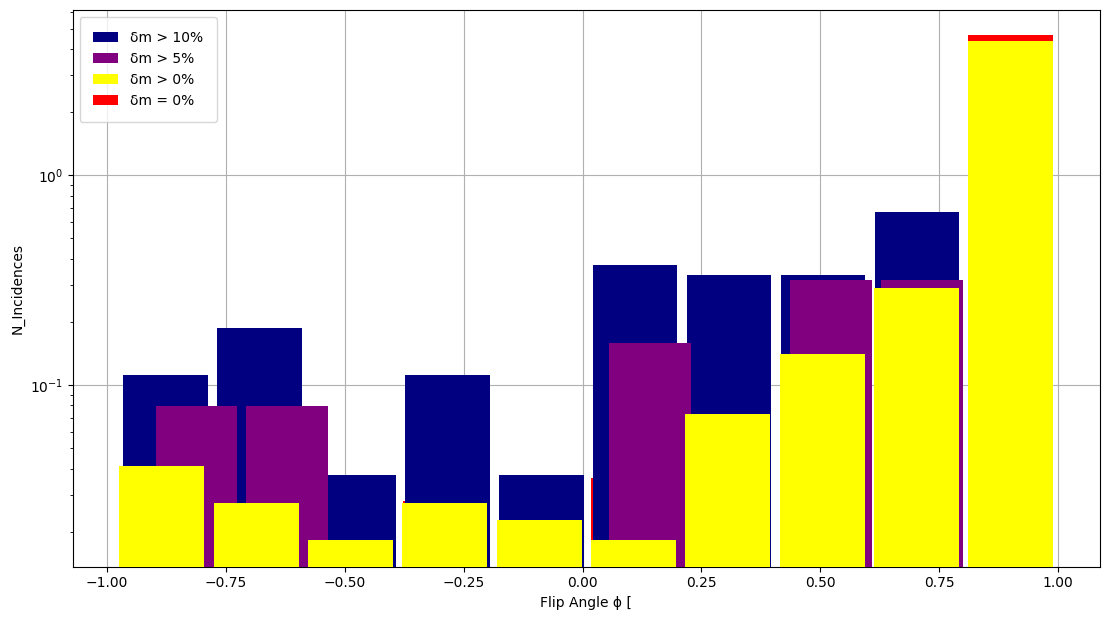

In [66]:
# Plotting the merger ratio groups

scale=0.7
N_bins= 10

fig, ax = subplots()

ax.hist(cosd.(mergers_g10["ϕ_flip"]), bins=N_bins, label="δm > 10%", density=true, rwidth=0.9, color="navy", alpha=1, zorder=3)#, edgecolor="black")
ax.hist(cosd.(mergers_g5["ϕ_flip"]), bins=N_bins, label="δm > 5%", density=true, rwidth=0.9, color="purple", alpha=1, zorder=3)#, edgecolor="black")
ax.hist(cosd.(mergers_g0["ϕ_flip"]), bins=N_bins, label="δm > 0%", density=true, rwidth=0.9, color="yellow", alpha=1, zorder=3)#, edgecolor="black")
ax.hist(cosd.(mergers_e0["ϕ_flip"]), bins=N_bins, label="δm = 0%", density=true, rwidth=0.9, color="red", alpha=1, zorder=2)#, edgecolor="black")
#ax.plot(xaxis_angles, all_random, "-", lw=3, color="red", label="Random Angles", alpha=0.8, zorder=4)
#ax.plot(xaxis_angles, sind.(xaxis_angles) .* length(angle_data["ANGLES"])./2, "-", lw=2, color="cyan", label="Random Angles", alpha=0.8, zorder=4)
#ax.bar(flipangle, height=3000, label="Flip Angle", color="black", zorder=5)

#ax.set_title("Instant Spin Orientation Change")
ax.set_xlabel("Flip Angle ϕ [")
ax.set_ylabel("N_Incidences")
ax.set_yscale("log")
ax.legend(loc="upper left", frameon=true, borderpad=1, handlelength=1.8)
ax.grid()


fig.set_size_inches(16scale, 9scale)
fig.tight_layout()

#fig.savefig(joinpath(@__DIR__, "plots/delta_histogram_CENTRAL_MSTARSgt$(th_MSOLAR).png"), bbox_inches="tight", pad_inches=.1)